In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Using TensorFlow backend.


Nesse notebook iremos fazer os modelos de predição usando como entrada 3 anos de informações das variáveis numéricas.

A execução da criação do modelo é parecida com a do Gamma11

In [3]:
train070911 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_0711.csv')
train091113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_0913.csv')
train111315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\train_1115.csv')

In [4]:
pred131517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_3anos\pred_1317.csv')

In [5]:
train070911_idebs = pd.DataFrame()
train091113_idebs = pd.DataFrame()
train111315_idebs = pd.DataFrame()
pred131517_idebs = pd.DataFrame()

train070911_idebs['Ideb2007'] = train070911['Ideb2007']
train070911_idebs['Ideb2009'] = train070911['Ideb2009']
train070911_idebs['Ideb2011'] = train070911['Ideb2011']

train091113_idebs['Ideb2009'] = train091113['Ideb2009']
train091113_idebs['Ideb2011'] = train091113['Ideb2011']
train091113_idebs['Ideb2013'] = train091113['Ideb2013']

train111315_idebs['Ideb2011'] = train111315['Ideb2011']
train111315_idebs['Ideb2013'] = train111315['Ideb2013']
train111315_idebs['Ideb2015'] = train111315['Ideb2015']

pred131517_idebs['Ideb2013'] = pred131517['Ideb2013']
pred131517_idebs['Ideb2015'] = pred131517['Ideb2015']
pred131517_idebs['Ideb2017'] = pred131517['Ideb2017']

In [6]:
train070911_target = train070911[['Ideb2013']]
train070911.drop(columns=['Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train091113_target = train091113[['Ideb2015']]
train091113.drop(columns=['Ideb2007','Ideb2015','Ideb2017'],inplace=True)

train111315_target = train111315[['Ideb2017']]
train111315.drop(columns=['Ideb2007','Ideb2009','Ideb2017'],inplace=True)

pred131517.drop(columns=['Ideb2007','Ideb2009','Ideb2011'],inplace=True)

In [7]:
list(pred131517.columns)

['Unnamed: 0',
 'ano_censo0',
 'Cod_Escola_Completo',
 'regiao0',
 'tp_dependencia0',
 'num_matriculas0',
 'num_estudantes0',
 'num_estudantes_ensino_infantil0',
 'num_estudantes_ensino_fund_anos_iniciais0',
 'num_estudantes_ensino_fund_anos_finais0',
 'num_estudantes_fund_1_ano0',
 'num_estudantes_fund_2_ano0',
 'num_estudantes_fund_3_ano0',
 'num_estudantes_fund_4_ano0',
 'num_estudantes_fund_5_ano0',
 'num_estudantes_fund_6_ano0',
 'num_estudantes_fund_7_ano0',
 'num_estudantes_fund_8_ano0',
 'num_estudantes_fund_9_ano0',
 'num_estudantes_medio_1_serie0',
 'num_estudantes_medio_2_serie0',
 'num_estudantes_medio_3_serie0',
 'num_turmas0',
 'tp_localizacao0',
 'num_salas_existentes0',
 'num_salas_utilizadas0',
 'num_equip_tv0',
 'num_equip_videocassete0',
 'num_equip_dvd0',
 'num_equip_parabolica0',
 'num_equip_copiadora0',
 'num_equip_retroprojetor0',
 'num_equip_impressora0',
 'num_equip_impressora_mult0',
 'num_equip_som0',
 'num_equip_multimidia0',
 'num_equip_fax0',
 'num_equip_f

In [9]:
Cod_Escolas = pred131517['Cod_Escola_Completo']

In [10]:
train070911.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','regiao','regiao0','regiao0.1'],inplace=True)
train091113.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','regiao','regiao0','regiao0.1'],inplace=True)
train111315.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','regiao','regiao0','regiao0.1'],inplace=True)

pred131517.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','regiao','regiao0','regiao0.1'],inplace=True)

In [11]:
list(pred131517.columns)

['tp_dependencia0',
 'num_matriculas0',
 'num_estudantes0',
 'num_estudantes_ensino_infantil0',
 'num_estudantes_ensino_fund_anos_iniciais0',
 'num_estudantes_ensino_fund_anos_finais0',
 'num_estudantes_fund_1_ano0',
 'num_estudantes_fund_2_ano0',
 'num_estudantes_fund_3_ano0',
 'num_estudantes_fund_4_ano0',
 'num_estudantes_fund_5_ano0',
 'num_estudantes_fund_6_ano0',
 'num_estudantes_fund_7_ano0',
 'num_estudantes_fund_8_ano0',
 'num_estudantes_fund_9_ano0',
 'num_estudantes_medio_1_serie0',
 'num_estudantes_medio_2_serie0',
 'num_estudantes_medio_3_serie0',
 'num_turmas0',
 'tp_localizacao0',
 'num_salas_existentes0',
 'num_salas_utilizadas0',
 'num_equip_tv0',
 'num_equip_videocassete0',
 'num_equip_dvd0',
 'num_equip_parabolica0',
 'num_equip_copiadora0',
 'num_equip_retroprojetor0',
 'num_equip_impressora0',
 'num_equip_impressora_mult0',
 'num_equip_som0',
 'num_equip_multimidia0',
 'num_equip_fax0',
 'num_equip_foto0',
 'num_computador0',
 'num_comp_administrativo0',
 'num_comp

In [12]:
train070911_s = scale(train070911)
train091113_s = scale(train091113)
train111315_s = scale(train111315)

pred131517_s = scale(pred131517)

train070911_idebs_s = scale(train070911_idebs)
train091113_idebs_s = scale(train091113_idebs)
train111315_idebs_s = scale(train111315_idebs)

pred131517_idebs_s = scale(pred131517_idebs)


C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


Criação do modelo 070911

In [13]:
pca_070911 = PCA(n_components=25)
pca_070911.fit(train070911_s)
train070911_t = pca_070911.transform(train070911_s)

In [14]:
#train070911_all = np.append(train070911_t, train070911_idebs_s,1)

In [15]:
X_train_070911, X_test_070911, y_train_070911, y_test_070911 = train_test_split(train070911_t,train070911_target,test_size=0.1,random_state=932)
model_070911 = Sequential()
n_cols = X_train_070911.shape[1]
model_070911.add(Dense(55,activation='relu',input_shape = (n_cols,)))
model_070911.add(Dense(39,activation='relu',input_shape = (n_cols,)))
#model_070911.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_070911.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [16]:
model_070911.compile(optimizer='adam',loss='mean_squared_error')
model_070911.fit(X_train_070911,y_train_070911,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23835 samples, validate on 5959 samples
Epoch 1/100
23835/23835 [==============================] - 1s 41us/step - loss: 1.7255 - val_loss: 0.4242
Epoch 2/100
23835/23835 [==============================] - 1s 33us/step - loss: 0.3795 - val_loss: 0.3628
Epoch 3/100
23835/23835 [==============================] - 1s 32us/step - loss: 0.3336 - val_loss: 0.3190
Epoch 4/100
23835/23835 [==============================] - 1s 33us/step - loss: 0.3127 - val_loss: 0.3220
Epoch 5/100
23835/23835 [==============================] - 1s 33us/step - loss: 0.2998 - val_loss: 0.3197


In [17]:
model_070911.evaluate(X_test_070911,y_test_070911)

3311/3311 [==============================] - 0s 15us/step


0.3376565613853935

In [75]:
model_070911.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_070911_num.h5')

Criação do modelo 091113

In [18]:
pca_091113 = PCA(n_components=25)
pca_091113.fit(train091113_s)
train091113_t = pca_091113.transform(train091113_s)

In [19]:
#train091113_all = np.append(train091113_t, train091113_idebs_s,1)

In [20]:
X_train_091113, X_test_091113, y_train_091113, y_test_091113 = train_test_split(train091113_t,train091113_target,test_size=0.1,random_state=932)
model_091113 = Sequential()
n_cols = X_train_091113.shape[1]
model_091113.add(Dense(24,activation='relu',input_shape = (n_cols,)))
model_091113.add(Dense(9,activation='relu',input_shape = (n_cols,)))
#model_091113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_091113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [21]:
model_091113.compile(optimizer='adam',loss='mean_squared_error')
model_091113.fit(X_train_091113,y_train_091113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23835 samples, validate on 5959 samples
Epoch 1/100
23835/23835 [==============================] - 1s 51us/step - loss: 4.0616 - val_loss: 0.9124
Epoch 2/100
23835/23835 [==============================] - 1s 38us/step - loss: 0.8017 - val_loss: 0.5616
Epoch 3/100
23835/23835 [==============================] - 1s 35us/step - loss: 0.4905 - val_loss: 0.4393
Epoch 4/100
23835/23835 [==============================] - 1s 36us/step - loss: 0.3995 - val_loss: 0.3803
Epoch 5/100
23835/23835 [==============================] - 1s 34us/step - loss: 0.3511 - val_loss: 0.3460
Epoch 6/100
23835/23835 [==============================] - 1s 31us/step - loss: 0.3268 - val_loss: 0.3287
Epoch 7/100
23835/23835 [==============================] - 1s 33us/step - loss: 0.3142 - val_loss: 0.3171
Epoch 8/100
23835/23835 [==============================] - 1s 31us/step - loss: 0.3044 - val_loss: 0.3081
Epoch 9/100
23835/23835 [==============================] - 1s 31us/step - loss: 0.2922 - val_loss: 0.30

In [22]:
model_091113.evaluate(X_test_091113,y_test_091113)

3311/3311 [==============================] - 0s 18us/step


0.26941051922583287

In [76]:
model_091113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_091113_num.h5')

Criação do modelo 111315

In [23]:
pca_111315 = PCA(n_components=25)
pca_111315.fit(train111315_s)
train111315_t = pca_111315.transform(train111315_s)

In [24]:
#train111315_all = np.append(train111315_t, train111315_idebs_s,1)

In [25]:
X_train_111315, X_test_111315, y_train_111315, y_test_111315 = train_test_split(train111315_t,train111315_target,test_size=0.1,random_state=932)
model_111315 = Sequential()
n_cols = X_train_091113.shape[1]
model_111315.add(Dense(53,activation='relu',input_shape = (n_cols,)))
model_111315.add(Dense(35,activation='relu',input_shape = (n_cols,)))
model_111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_111315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [26]:
model_111315.compile(optimizer='adam',loss='mean_squared_error')
model_111315.fit(X_train_111315,y_train_111315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23824 samples, validate on 5957 samples
Epoch 1/100
23824/23824 [==============================] - 1s 47us/step - loss: 2.3577 - val_loss: 1.0044
Epoch 2/100
23824/23824 [==============================] - 1s 35us/step - loss: 0.4754 - val_loss: 0.5099
Epoch 3/100
23824/23824 [==============================] - 1s 36us/step - loss: 0.3530 - val_loss: 0.4067
Epoch 4/100
23824/23824 [==============================] - 1s 36us/step - loss: 0.3248 - val_loss: 0.3788
Epoch 5/100
23824/23824 [==============================] - 1s 36us/step - loss: 0.3093 - val_loss: 0.3507
Epoch 6/100
23824/23824 [==============================] - 1s 38us/step - loss: 0.2952 - val_loss: 0.3424
Epoch 7/100
23824/23824 [==============================] - 1s 41us/step - loss: 0.2918 - val_loss: 0.3171
Epoch 8/100
23824/23824 [==============================] - 1s 35us/step - loss: 0.2918 - val_loss: 0.3100
Epoch 9/100
23824/23824 [==============================] - 1s 35us/step - loss: 0.2862 - val_loss: 0.29

In [67]:
model_111315.evaluate(X_test_111315,y_test_111315)

3309/3309 [==============================] - 0s 18us/step


0.2937146759025998

In [77]:
model_111315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_111315_num.h5')

Output

In [27]:
pred070911_t = pca_070911.transform(pred131517_s)
pred091113_t = pca_091113.transform(pred131517_s)
pred111315_t = pca_111315.transform(pred131517_s)

In [43]:
pred070911_t.shape

(33089, 25)

In [46]:
pd.DataFrame(pred070911_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred070911_t_num.csv')
pd.DataFrame(pred091113_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred091113_t_num.csv')
pd.DataFrame(pred111315_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred111315_t_num.csv')

In [28]:
#pred070911_all = np.append(pred070911_t,pred131517_idebs_s,1)
#pred091113_all = np.append(pred091113_t,pred131517_idebs_s,1)
#pred111315_all = np.append(pred111315_t,pred131517_idebs_s,1)

In [29]:
pred_070911 = pd.Series(data=model_070911.predict(pred070911_t)[:,0])
pred_091113 = pd.Series(data=model_091113.predict(pred091113_t)[:,0])
pred_111315 = pd.Series(data=model_111315.predict(pred111315_t)[:,0])

In [30]:
ideb2013_media = 4.827615 #train070911_target.mean()
ideb2015_media = 5.131125 #train091113_target.mean()
ideb2017_media = 5.353015 #train111315_target.mean()

In [31]:
cte = (5.353015/5.131125 + 5.131125/4.827615)/2

In [33]:
output = pd.DataFrame()
output['pred_070911'] = (5.353015 + (pred_070911 - 4.827615))*cte
output['pred_091113'] = (5.353015 + (pred_091113 - 5.131125))*cte
output['pred_111315'] = (5.353015 + (pred_111315 - 5.353015))*cte
output['ensemble'] = ((output['pred_070911']+output['pred_091113']+output['pred_111315'])/3)
output['Ideb2017'] = pred131517['Ideb2017'] 
output['dif'] = output['ensemble'] - output['Ideb2017']
output['Cod_Escola'] = Cod_Escolas

In [34]:
output.describe()

,pred_070911,pred_091113,pred_111315,ensemble,Ideb2017,dif,Cod_Escola
count,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,3.308900e+04
mean,5.717157,5.695366,5.744804,5.719109,5.352885,0.366224,3.302651e+07
std,1.057664,1.046725,1.055802,1.035547,1.101263,0.339201,9.647336e+06
min,2.757981,2.396585,2.708796,2.824128,1.600000,-1.901701,1.100026e+07
25%,4.941154,4.898365,4.958163,4.941950,4.600000,0.156415,2.703266e+07
50%,5.670814,5.651355,5.707042,5.670154,5.300000,0.368065,3.303962e+07
75%,6.482865,6.498649,6.554876,6.501425,6.200000,0.578929,4.105247e+07
max,18.362631,9.954527,15.439406,10.823819,9.600000,6.423819,5.301462e+07


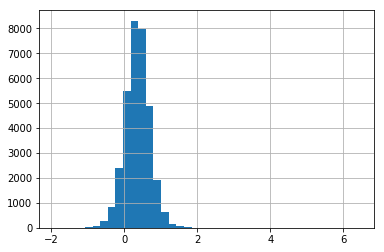

In [35]:
output['dif'].hist(bins=40)

In [36]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif

,pred_070911,pred_091113,pred_111315,ensemble,Ideb2017,dif,Cod_Escola
27892,18.362631,8.799182,5.309646,10.823819,4.4,6.423819,50017802
1560,7.373998,5.341418,15.439406,9.384941,5.7,3.684941,29181429
14184,4.896156,5.736555,5.826819,5.486510,2.6,2.886510,26048841
6217,9.022797,5.752340,7.287170,7.354102,4.7,2.654102,33067252
16,9.611457,9.954527,8.801299,9.455761,7.1,2.355761,33124361
17659,5.179384,6.088244,6.208602,5.825410,3.5,2.325410,26146916
12795,4.825310,4.372325,4.492111,4.563249,2.3,2.263249,13055810
15002,10.083798,6.116942,5.924566,7.375102,5.2,2.175102,21233594
20,8.918793,8.434145,8.667464,8.673467,6.5,2.173467,33085447
18,10.263745,8.368629,8.825013,9.152463,7.0,2.152463,33071837


In [37]:
best_esc_pred3 = output_sort_dif.head(1000)

In [38]:
best_esc_pred3.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred3(sem_ideb).csv')